In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

/Users/zzheng/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs
!mkdir -p outputs/generator1

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:09, 12.19it/s]                         


Epoch 1 of 100
Generator loss: 1.54869413, Discriminator loss: 0.84840035


118it [00:09, 12.45it/s]                         


Epoch 2 of 100
Generator loss: 3.74651980, Discriminator loss: 1.29665470


118it [00:09, 12.13it/s]                         


Epoch 3 of 100
Generator loss: 4.78253937, Discriminator loss: 0.25799614


118it [00:09, 12.04it/s]                         


Epoch 4 of 100
Generator loss: 2.68623567, Discriminator loss: 0.93119800


118it [00:09, 12.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


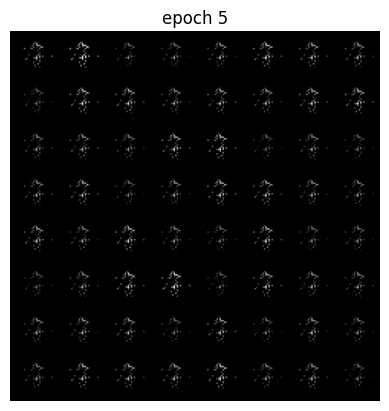

Epoch 5 of 100
Generator loss: 1.62159407, Discriminator loss: 1.30106103


118it [00:09, 12.03it/s]                         


Epoch 6 of 100
Generator loss: 1.60812259, Discriminator loss: 0.95768571


118it [00:10, 11.65it/s]                         


Epoch 7 of 100
Generator loss: 2.01492000, Discriminator loss: 1.02915740


118it [00:10, 11.47it/s]                         


Epoch 8 of 100
Generator loss: 1.89063990, Discriminator loss: 1.11443150


118it [00:10, 11.52it/s]                         


Epoch 9 of 100
Generator loss: 2.89802337, Discriminator loss: 1.14947486


118it [00:09, 11.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


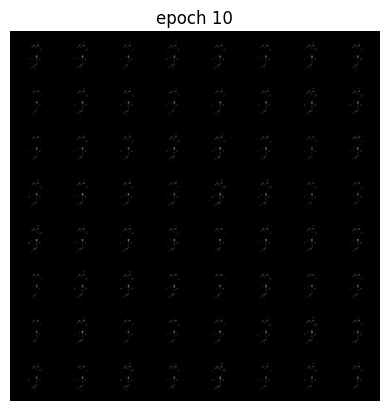

Epoch 10 of 100
Generator loss: 1.82787812, Discriminator loss: 0.93842649


118it [00:09, 11.81it/s]                         


Epoch 11 of 100
Generator loss: 1.36366308, Discriminator loss: 1.15000737


118it [00:09, 11.91it/s]                         


Epoch 12 of 100
Generator loss: 2.75107837, Discriminator loss: 0.88055998


118it [00:10, 11.76it/s]                         


Epoch 13 of 100
Generator loss: 2.95549202, Discriminator loss: 0.97494364


118it [00:09, 11.89it/s]                         


Epoch 14 of 100
Generator loss: 1.76206326, Discriminator loss: 0.94776392


118it [00:09, 12.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


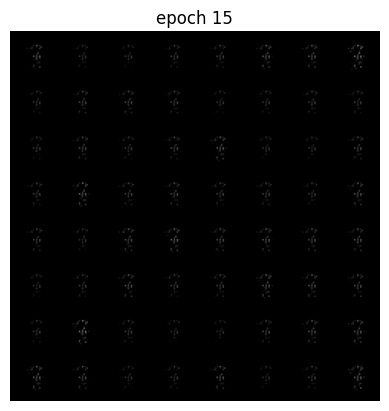

Epoch 15 of 100
Generator loss: 1.79627466, Discriminator loss: 1.12094271


118it [00:09, 12.11it/s]                         


Epoch 16 of 100
Generator loss: 1.63570881, Discriminator loss: 0.89881885


118it [00:09, 12.41it/s]                         


Epoch 17 of 100
Generator loss: 2.21932054, Discriminator loss: 0.85651559


118it [00:09, 12.38it/s]                         


Epoch 18 of 100
Generator loss: 2.31928325, Discriminator loss: 0.56558979


118it [00:09, 11.85it/s]                         


Epoch 19 of 100
Generator loss: 2.22416306, Discriminator loss: 0.60356933


118it [00:09, 12.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


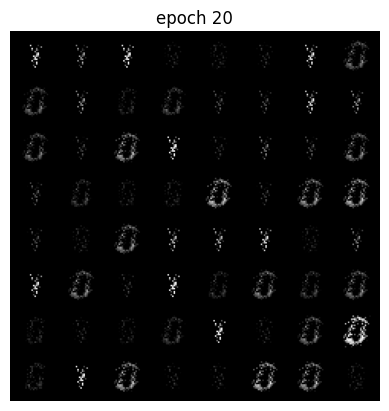

Epoch 20 of 100
Generator loss: 2.89740777, Discriminator loss: 0.41067332


118it [00:09, 12.41it/s]                         


Epoch 21 of 100
Generator loss: 3.05869317, Discriminator loss: 0.36065429


118it [00:09, 12.31it/s]                         


Epoch 22 of 100
Generator loss: 3.38704038, Discriminator loss: 0.25853005


118it [00:09, 12.06it/s]                         


Epoch 23 of 100
Generator loss: 3.55755448, Discriminator loss: 0.39521837


118it [00:09, 12.06it/s]                         


Epoch 24 of 100
Generator loss: 2.87541127, Discriminator loss: 0.48743346


118it [00:09, 12.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


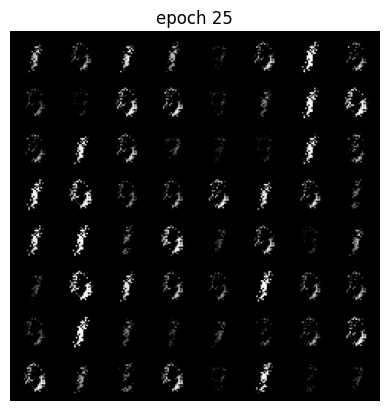

Epoch 25 of 100
Generator loss: 3.55402374, Discriminator loss: 0.37239769


118it [00:09, 11.98it/s]                         


Epoch 26 of 100
Generator loss: 3.53806186, Discriminator loss: 0.34846982


118it [00:09, 12.13it/s]                         


Epoch 27 of 100
Generator loss: 3.19737554, Discriminator loss: 0.47603893


118it [00:09, 12.21it/s]                         


Epoch 28 of 100
Generator loss: 3.07190609, Discriminator loss: 0.46502388


118it [00:09, 11.94it/s]                         


Epoch 29 of 100
Generator loss: 3.12058496, Discriminator loss: 0.43016168


118it [00:09, 12.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


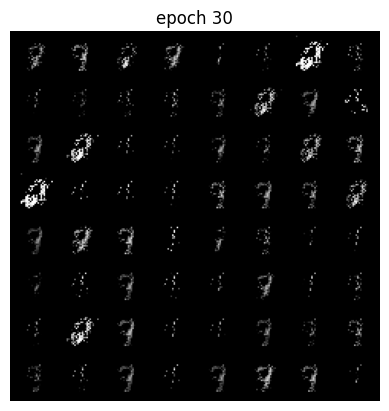

Epoch 30 of 100
Generator loss: 3.43366981, Discriminator loss: 0.40699020


118it [00:09, 12.17it/s]                         


Epoch 31 of 100
Generator loss: 3.29491186, Discriminator loss: 0.37538844


118it [00:09, 11.88it/s]                         


Epoch 32 of 100
Generator loss: 3.44086266, Discriminator loss: 0.34029263


118it [00:09, 12.03it/s]                         


Epoch 33 of 100
Generator loss: 3.53854823, Discriminator loss: 0.37052703


118it [00:09, 12.19it/s]                         


Epoch 34 of 100
Generator loss: 3.20329952, Discriminator loss: 0.49775279


118it [00:09, 12.00it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


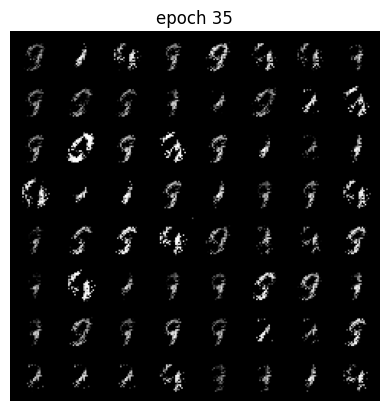

Epoch 35 of 100
Generator loss: 3.28549623, Discriminator loss: 0.47169921


118it [00:09, 12.10it/s]                         


Epoch 36 of 100
Generator loss: 3.25789928, Discriminator loss: 0.43632013


118it [00:09, 12.25it/s]                         


Epoch 37 of 100
Generator loss: 3.29295754, Discriminator loss: 0.43791065


118it [00:09, 12.14it/s]                         


Epoch 38 of 100
Generator loss: 3.29070878, Discriminator loss: 0.44377330


118it [00:09, 11.97it/s]                         


Epoch 39 of 100
Generator loss: 3.34757900, Discriminator loss: 0.43490505


118it [00:09, 11.92it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


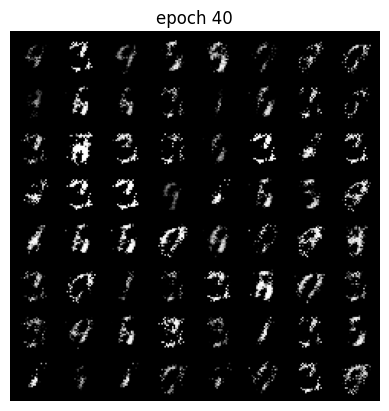

Epoch 40 of 100
Generator loss: 3.26592517, Discriminator loss: 0.42879543


118it [00:09, 12.13it/s]                         


Epoch 41 of 100
Generator loss: 3.12155414, Discriminator loss: 0.45766437


118it [00:09, 12.16it/s]                         


Epoch 42 of 100
Generator loss: 3.43230534, Discriminator loss: 0.43806228


118it [00:09, 12.25it/s]                         


Epoch 43 of 100
Generator loss: 2.99916983, Discriminator loss: 0.50565314


118it [00:09, 12.20it/s]                         


Epoch 44 of 100
Generator loss: 3.02035093, Discriminator loss: 0.54887193


118it [00:09, 12.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


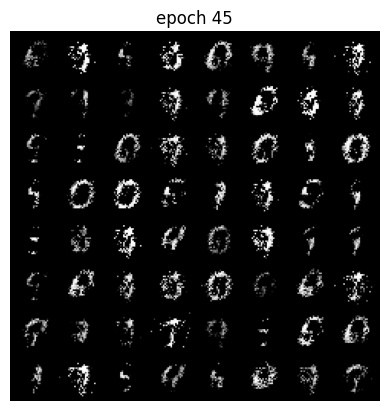

Epoch 45 of 100
Generator loss: 2.93043065, Discriminator loss: 0.50244325


118it [00:09, 12.18it/s]                         


Epoch 46 of 100
Generator loss: 3.06265807, Discriminator loss: 0.52685112


118it [00:09, 12.18it/s]                         


Epoch 47 of 100
Generator loss: 2.72606874, Discriminator loss: 0.60890692


118it [00:09, 12.06it/s]                         


Epoch 48 of 100
Generator loss: 2.96192479, Discriminator loss: 0.53741986


118it [00:09, 12.03it/s]                         


Epoch 49 of 100
Generator loss: 2.84726667, Discriminator loss: 0.55189651


118it [00:09, 11.98it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


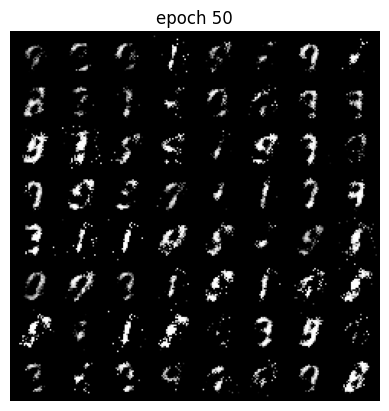

Epoch 50 of 100
Generator loss: 3.01958776, Discriminator loss: 0.53791445


118it [00:09, 11.86it/s]                         


Epoch 51 of 100
Generator loss: 3.10202479, Discriminator loss: 0.46390790


118it [00:09, 12.02it/s]                         


Epoch 52 of 100
Generator loss: 3.15517354, Discriminator loss: 0.46358556


118it [00:09, 12.12it/s]                         


Epoch 53 of 100
Generator loss: 3.18673468, Discriminator loss: 0.46098500


118it [00:09, 12.28it/s]                         


Epoch 54 of 100
Generator loss: 2.71952510, Discriminator loss: 0.62228894


118it [00:09, 12.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


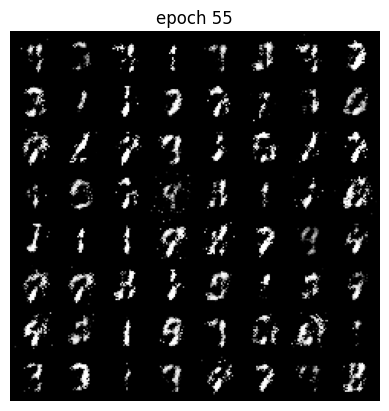

Epoch 55 of 100
Generator loss: 2.87349534, Discriminator loss: 0.57283837


118it [00:09, 12.37it/s]                         


Epoch 56 of 100
Generator loss: 2.73483658, Discriminator loss: 0.55181807


118it [00:09, 12.55it/s]                         


Epoch 57 of 100
Generator loss: 2.86290574, Discriminator loss: 0.53315037


118it [00:09, 12.32it/s]                         


Epoch 58 of 100
Generator loss: 2.71337986, Discriminator loss: 0.56830776


118it [00:09, 12.50it/s]                         


Epoch 59 of 100
Generator loss: 2.87364554, Discriminator loss: 0.51763612


118it [00:09, 12.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


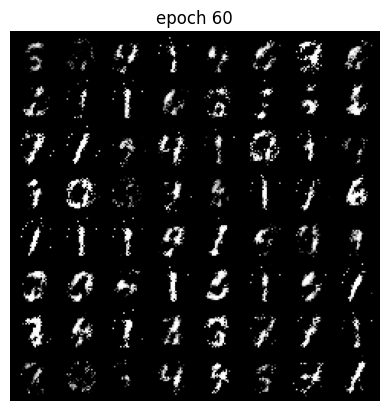

Epoch 60 of 100
Generator loss: 2.67444563, Discriminator loss: 0.57112414


118it [00:09, 12.57it/s]                         


Epoch 61 of 100
Generator loss: 2.80638146, Discriminator loss: 0.55956888


118it [00:10, 11.78it/s]                         


Epoch 62 of 100
Generator loss: 2.52553487, Discriminator loss: 0.62943345


118it [00:09, 12.00it/s]                         


Epoch 63 of 100
Generator loss: 2.53784060, Discriminator loss: 0.62445265


118it [00:09, 12.00it/s]                         


Epoch 64 of 100
Generator loss: 2.38655806, Discriminator loss: 0.66486663


118it [00:09, 12.00it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


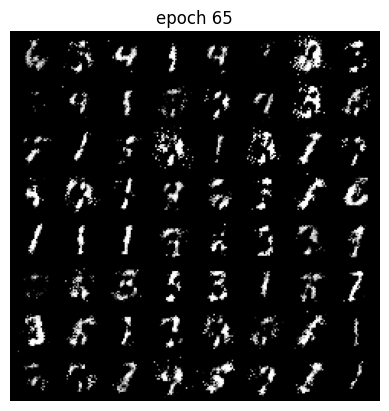

Epoch 65 of 100
Generator loss: 2.49730539, Discriminator loss: 0.64539212


118it [00:09, 12.04it/s]                         


Epoch 66 of 100
Generator loss: 2.36290884, Discriminator loss: 0.62755567


118it [00:09, 12.00it/s]                         


Epoch 67 of 100
Generator loss: 2.56395960, Discriminator loss: 0.58270079


118it [00:09, 12.10it/s]                         


Epoch 68 of 100
Generator loss: 2.61040139, Discriminator loss: 0.61393297


118it [00:09, 12.11it/s]                         


Epoch 69 of 100
Generator loss: 2.42942739, Discriminator loss: 0.63451290


118it [00:09, 12.08it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


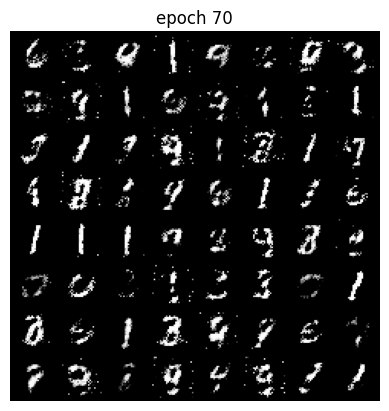

Epoch 70 of 100
Generator loss: 2.45122290, Discriminator loss: 0.62034881


118it [00:09, 12.10it/s]                         


Epoch 71 of 100
Generator loss: 2.54602289, Discriminator loss: 0.60047209


118it [00:09, 12.09it/s]                         


Epoch 72 of 100
Generator loss: 2.48721337, Discriminator loss: 0.61711621


118it [00:09, 11.98it/s]                         


Epoch 73 of 100
Generator loss: 2.39374399, Discriminator loss: 0.65822339


118it [00:08, 13.28it/s]                         


Epoch 74 of 100
Generator loss: 2.39905906, Discriminator loss: 0.69897437


118it [00:08, 13.54it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


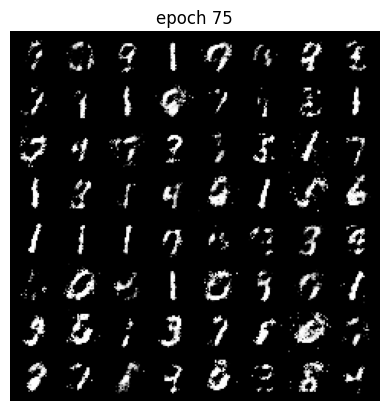

Epoch 75 of 100
Generator loss: 2.07327366, Discriminator loss: 0.74313992


118it [00:08, 13.26it/s]                         


Epoch 76 of 100
Generator loss: 2.15167260, Discriminator loss: 0.67214257


118it [00:08, 13.37it/s]                         


Epoch 77 of 100
Generator loss: 2.22695732, Discriminator loss: 0.65198660


118it [00:08, 13.23it/s]                         


Epoch 78 of 100
Generator loss: 2.14496899, Discriminator loss: 0.71512759


118it [00:08, 13.14it/s]                         


Epoch 79 of 100
Generator loss: 2.07420516, Discriminator loss: 0.74609917


118it [00:08, 13.26it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


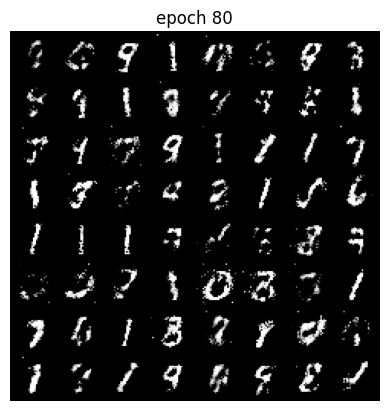

Epoch 80 of 100
Generator loss: 2.11430573, Discriminator loss: 0.72057760


118it [00:09, 12.34it/s]                         


Epoch 81 of 100
Generator loss: 2.10418630, Discriminator loss: 0.73313534


118it [00:09, 12.43it/s]                         


Epoch 82 of 100
Generator loss: 2.16904759, Discriminator loss: 0.70666975


118it [00:09, 12.12it/s]                         


Epoch 83 of 100
Generator loss: 2.17989469, Discriminator loss: 0.72719628


118it [00:09, 12.21it/s]                         


Epoch 84 of 100
Generator loss: 2.10382962, Discriminator loss: 0.76395559


118it [00:09, 12.04it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


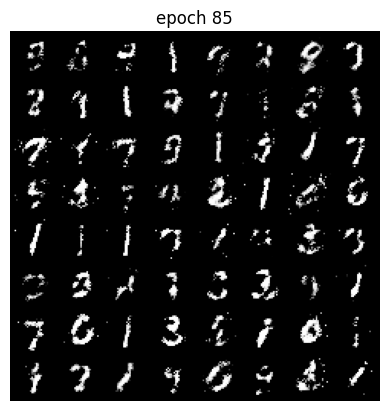

Epoch 85 of 100
Generator loss: 2.26007891, Discriminator loss: 0.70347232


118it [00:09, 12.16it/s]                         


Epoch 86 of 100
Generator loss: 2.10697794, Discriminator loss: 0.73893338


118it [00:09, 12.01it/s]                         


Epoch 87 of 100
Generator loss: 2.08646941, Discriminator loss: 0.78522903


118it [00:09, 12.25it/s]                         


Epoch 88 of 100
Generator loss: 1.95951986, Discriminator loss: 0.79575545


118it [00:09, 12.17it/s]                         


Epoch 89 of 100
Generator loss: 2.13940954, Discriminator loss: 0.77637219


118it [00:09, 12.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


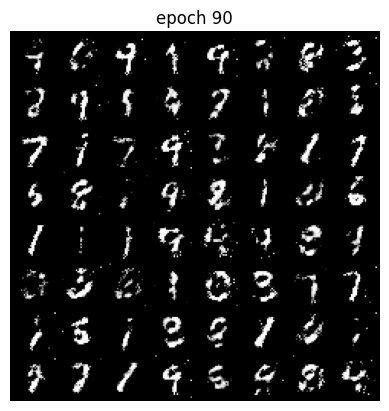

Epoch 90 of 100
Generator loss: 1.91828775, Discriminator loss: 0.82973421


118it [00:09, 12.03it/s]                         


Epoch 91 of 100
Generator loss: 1.90191770, Discriminator loss: 0.79278934


118it [00:09, 11.93it/s]                         


Epoch 92 of 100
Generator loss: 1.97337210, Discriminator loss: 0.79916751


118it [00:09, 12.38it/s]                         


Epoch 93 of 100
Generator loss: 2.03412414, Discriminator loss: 0.75825101


118it [00:09, 12.50it/s]                         


Epoch 94 of 100
Generator loss: 2.04301119, Discriminator loss: 0.77843392


118it [00:08, 13.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


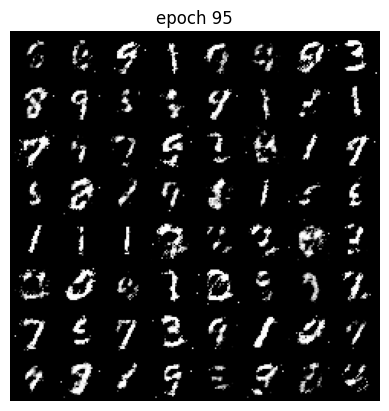

Epoch 95 of 100
Generator loss: 2.06358767, Discriminator loss: 0.79782724


118it [00:08, 13.45it/s]                         


Epoch 96 of 100
Generator loss: 1.94971764, Discriminator loss: 0.81335217


118it [00:09, 12.05it/s]                         


Epoch 97 of 100
Generator loss: 1.98104692, Discriminator loss: 0.78435373


118it [00:09, 12.17it/s]                         


Epoch 98 of 100
Generator loss: 2.12364221, Discriminator loss: 0.75222629


118it [00:09, 12.40it/s]                         


Epoch 99 of 100
Generator loss: 1.96125340, Discriminator loss: 0.78473800


118it [00:09, 12.45it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


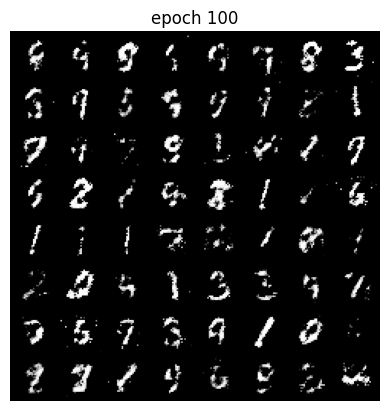

Epoch 100 of 100
Generator loss: 1.86210346, Discriminator loss: 0.82370228


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    noise_in_training = create_noise(batch_size, nz)
    generated_data = generator(noise_in_training)
    discriminator_generator_data = discriminator(generated_data)
    return criterion(discriminator_generator_data, true_label)
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    noise_in_training = create_noise(batch_size, nz)
    generated_data = generator(noise_in_training)
    discriminator_data = discriminator(output)
    discriminator_loss_data = criterion(discriminator_data, label_real(discriminator_data.shape[0]))    
    discriminator_generator_data = discriminator(generated_data.detach())
    discriminator_loss_generator = criterion(discriminator_generator_data, label_fake(batch_size))
    return discriminator_loss_data + discriminator_loss_generator
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        data_x = data[0]
        data_y = data[1]
        
        optim_d.zero_grad()
        
        # noise_in_training = create_noise(batch_size, nz)
        # generated_data = generator(noise_in_training)
        # discriminator_data = discriminator(data_x)
        # discriminator_loss_data = discriminator_loss(discriminator_data,label_real(discriminator_data.shape[0]))    
        # discriminator_generator_data = discriminator(generated_data.detach())
        # discriminator_loss_generator = discriminator_loss(discriminator_generator_data, label_fake(batch_size))
        # discriminator_loss_value = (discriminator_loss_data + discriminator_loss_generator)
        discriminator_loss_value = discriminator_loss(data_x,None)
        discriminator_loss_value.backward()
        optim_d.step()
        loss_d = loss_d + discriminator_loss_value       
        
        optim_g.zero_grad()
        # noise_in_training = create_noise(batch_size, nz)
        # generated_data = generator(noise_in_training)
        # discriminator_generator_data = discriminator(generated_data)
        # generator_loss_value = generator_loss(discriminator_generator_data, label_real(batch_size))
        generator_loss_value = generator_loss(None, label_real(batch_size))
        generator_loss_value.backward()
        optim_g.step()
        loss_g = loss_g + generator_loss_value  
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/generator1/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator1/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator1/generator_images.gif', imgs)

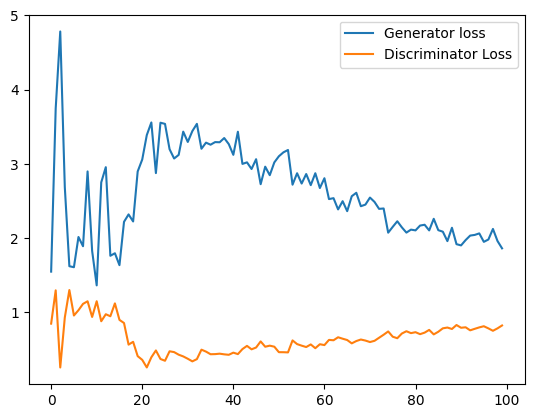

In [18]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot([g.item() for g in losses_g], label='Generator loss')
plt.plot([d.item() for d in losses_d], label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/generator1/loss.png')